## Exploratory Data Analysis

### Detective and Trial Comparison

### Key elements of EDA

#### visualisation of data

beginning, best to plot data directly, like stem abd leaf plot or dotplot as opposed to sumarries like boxplot (Behrens, p.137)

#### iterative process 

data = fit + residual 

fit a model to the data (summarise), but no model fits perfectyly leaving a residual 

the boxplot shos the fir (median) but also the residual, ddviations, in particular outlers which are not explained by the mean 

(Behrens, p.140)

cyclical process of attempting to fit a model, observe for residuals and then improve model 

#### robust statistics

median, not as affected by outliers also helps identify outliers 

mean can be misleading 

#### outliers


### Five Number Sumarry 

### boxplot


### Stem and Leaf Plot 

In [14]:
import numpy as np
import pandas as pd 
import stemgraphic
import matplotlib.pyplot as plt
https://stackoverflow.com/questions/45655321/is-there-a-pandas-function-for-creating-a-stem-and-leaf-plot/45656792#45656792


In [10]:
x = np.random.randint(100, size=50)
y = pd.Series(x)
print(y)

0     94
1     19
2     72
3      1
4      4
5     15
6      4
7     36
8     15
9     55
10    75
11    50
12     9
13    95
14    28
15     4
16    49
17    17
18    84
19    37
20    84
21    25
22    81
23    28
24    74
25    27
26    48
27    67
28     7
29    32
30    79
31     2
32    17
33    44
34     4
35    92
36     4
37    48
38     5
39    52
40    28
41    27
42    63
43    67
44    84
45    81
46    50
47    77
48    29
49    79
dtype: int32


C:\Users\dermotkel\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


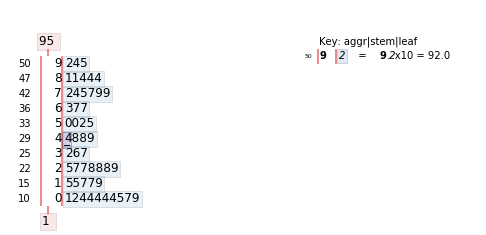

In [15]:
fig, ax = stemgraphic.stem_graphic(y)
plt.savefig('fig.png',bbox_inches='tight') 

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://github.com/helloworlddata/white-house-salaries/blob/master/data/compiled/white-house-salaries.csv", sep=",")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 32, saw 2


In [ ]:
df.head()